# Training & Validating

Experiments were conducted using:
- `mb_vae_dti/training/run.py`: command line interface for training
- and the scripts in `scripts/training/` for running the experiments

This notebook shows some plots and analysis of the unsupervised pretraining, general DTI training and benchmark fine-tuning results.

In [76]:
from resolve import *

Setting working directory to: /home/robsyc/Desktop/thesis/MB-VAE-DTI


In [ ]:
# Analyzing collected results

from mb_vae_dti.validating.analysis import *

df = load_gridsearch_results("notebooks/results/baseline_kiba_rand/")

df

top_5 = df.sort_values(by="best_val_loss", ascending=True).head(5)
print(round(get_test_averages(top_5), 4))
print(f"Params: {top_5['trainable_params'].mean() / 1000000:.1f}M")

# # # get subsets with desired distinction (encoder_type and aggregator_type)
# with_concat = df[df["config.model.aggregator_type"] == "concat"]
# with_attentive = df[df["config.model.aggregator_type"] == "attentive"]

# # # get 5 best performers
# with_concat_best = with_concat.sort_values(by="best_val_loss", ascending=True).head(5)
# with_attentive_best = with_attentive.sort_values(by="best_val_loss", ascending=True).head(5)

# # # get stats
# print(f"Params: {with_concat_best['trainable_params'].mean() / 1000000:.1f}M")
# print(round(get_test_averages(with_concat_best), 4))
# print("-" * 100)
# print(f"Params: {with_attentive_best['trainable_params'].mean() / 1000000:.1f}M")
# print(round(get_test_averages(with_attentive_best), 4))

# cols_of_interest = ["experiment_name", "trainable_params", "test/real_pKd_mse", "test/real_pKi_mse", "test/real_KIBA_mse", "test/binary_accuracy", "test/binary_f1", "test/binary_auprc"]
# df_test = df[cols_of_interest].copy()
# df_test.columns = [col.replace("test/", "") if col.startswith("test/") else col for col in df_test.columns]
# print(df_test.to_string(index=False, float_format="{:8.4f}".format))

# df = load_gridsearch_results("notebooks/results/train_cold/")
# cols_of_interest = ["experiment_name", "trainable_params", "test/real_pKd_mse", "test/real_pKi_mse", "test/real_KIBA_mse", "test/binary_accuracy", "test/binary_f1", "test/binary_auprc"]
# df_test = df[cols_of_interest].copy()
# df_test.columns = [col.replace("test/", "") if col.startswith("test/") else col for col in df_test.columns]
# print(df_test.to_string(index=False, float_format="{:8.4f}".format))

2025-08-03 16:46:33,824 - mb_vae_dti.validating.analysis - INFO - Loading 64 result files from notebooks/results/baseline_kiba_rand


test/loss              0.1573
test/Y_KIBA_ci         0.8595
test/Y_KIBA_mse        0.1573
test/Y_KIBA_pearson    0.8749
test/Y_KIBA_r2         0.7648
test/Y_KIBA_rmse       0.3966
dtype: float64
Params: 16.9M


In [78]:
top_5

,experiment_name,best_val_loss,best_epoch,trainable_params,val/loss,val/Y_KIBA_ci,val/Y_KIBA_mse,val/Y_KIBA_pearson,val/Y_KIBA_r2,val/Y_KIBA_rmse,...,config.loss.weights,config.data.batch_size,config.data.h5_path,config.data.drug_features,config.data.target_features,config.model.embedding_dim,config.model.hidden_dim,config.model.n_layers,config.model.dropout,config.model.encoder_type
61,baseline_finetune_KIBA_cold_b00c0004,0.333460,50,16841728,0.333460,0.760062,0.333460,0.699008,0.472883,0.688165,...,1_0_0_0,64,data/input/dti.h5torch,FP-Morgan,FP-ESP,1024,512,3,0.1,resnet
28,baseline_finetune_KIBA_cold_b01c0004,0.338392,34,16841728,0.338392,0.753427,0.338392,0.690234,0.464987,0.670500,...,1_0_0_0,32,data/input/dti.h5torch,FP-Morgan,FP-ESP,1024,512,3,0.1,resnet
16,baseline_finetune_KIBA_cold_b00c0001,0.339152,26,12908544,0.339152,0.752964,0.339152,0.690663,0.463886,0.752744,...,1_0_0_0,64,data/input/dti.h5torch,FP-Morgan,FP-ESP,768,512,2,0.1,transformer
29,baseline_finetune_KIBA_cold_b00c0018,0.339814,45,17375488,0.339814,0.753953,0.339814,0.691998,0.462838,0.690825,...,1_0_0_0,64,data/input/dti.h5torch,FP-Morgan,FP-ESP,768,512,3,0.1,transformer
33,baseline_finetune_KIBA_cold_b00c0026,0.340133,26,12908544,0.340133,0.752621,0.340133,0.692200,0.462234,0.697769,...,1_0_0_0,32,data/input/dti.h5torch,FP-Morgan,FP-ESP,768,512,2,0.1,transformer


In [57]:
df.sort_values(by="best_val_loss", ascending=True)[
    ['experiment_name', 'best_val_loss', 'best_epoch', 'test/loss', 'config.data.batch_size',
     'config.model.embedding_dim', 'config.model.hidden_dim', 
     'config.model.n_layers', 'config.model.dropout', 'config.training.learning_rate',
     'config.model.encoder_type']#, 'config.model.aggregator_type']
    ].head(5)
# df.columns

,experiment_name,best_val_loss,best_epoch,test/loss,config.data.batch_size,config.model.embedding_dim,config.model.hidden_dim,config.model.n_layers,config.model.dropout,config.training.learning_rate,config.model.encoder_type
61,baseline_finetune_KIBA_cold_b00c0004,0.333460,50,0.369488,64,1024,512,3,0.1,0.0005,resnet
28,baseline_finetune_KIBA_cold_b01c0004,0.338392,34,0.371440,32,1024,512,3,0.1,0.0005,resnet
16,baseline_finetune_KIBA_cold_b00c0001,0.339152,26,0.366906,64,768,512,2,0.1,0.0005,transformer
29,baseline_finetune_KIBA_cold_b00c0018,0.339814,45,0.371739,64,768,512,3,0.1,0.0005,transformer
33,baseline_finetune_KIBA_cold_b00c0026,0.340133,26,0.371350,32,768,512,2,0.1,0.0005,transformer


In [52]:
df.columns

Index(['experiment_name', 'best_val_loss', 'best_epoch', 'trainable_params',
       'val/loss', 'val/Y_pKd_ci', 'val/Y_pKd_mse', 'val/Y_pKd_pearson',
       'val/Y_pKd_r2', 'val/Y_pKd_rmse', 'test/loss', 'test/Y_pKd_ci',
       'test/Y_pKd_mse', 'test/Y_pKd_pearson', 'test/Y_pKd_r2',
       'test/Y_pKd_rmse', 'total_training_time', 'avg_time_per_epoch',
       'total_epochs', 'config.training.learning_rate',
       'config.training.scheduler', 'config.loss.weights',
       'config.data.batch_size', 'config.data.h5_path',
       'config.data.drug_features', 'config.data.target_features',
       'config.model.embedding_dim', 'config.model.hidden_dim',
       'config.model.n_layers', 'config.model.dropout',
       'config.model.encoder_type'],
      dtype='object')

---

In [ ]:
# Generating a molecule from the limit distribution

from mb_vae_dti.training.diffusion.utils import *
import json
import torch

json_path = "data/processed/molecular_statistics.json"

stats = json.load(open(json_path))

dataset_name = "drugs_cold"

visualization_tools = MolecularVisualization(stats["general"]["atom_types"])
nodes_dist = DistributionNodes(stats["datasets"][dataset_name]["node_count_distribution"])
limit_dist = PlaceHolder(
    X=torch.tensor(stats["datasets"][dataset_name]["node_marginals"]), 
    E=torch.tensor(stats["datasets"][dataset_name]["edge_marginals"]), 
    y=torch.ones(1) / 1
)

print(f"Limit distribution\nX: {limit_dist.X.shape}\nE: {limit_dist.E.shape}")

n_nodes = nodes_dist.sample_n(1, device="cpu")
print(f"Number of nodes: {n_nodes} (sampled)")

arange = torch.arange(max(n_nodes), device="cpu").unsqueeze(0).expand(1, -1)
node_mask = arange < n_nodes.unsqueeze(1)

print(f"Node mask: {node_mask}")

z_T = sample_discrete_feature_noise(limit_dist=limit_dist, node_mask=node_mask)

print(f"Z_T.X.shape: {z_T.X.shape}")
print(f"Z_T.E.shape: {z_T.E.shape}")

edge_types = torch.argmax(z_T.E, dim=-1)
edge_types = edge_types# - 1
node_types = torch.argmax(z_T.X, dim=-1)


limit_mol = visualization_tools.mol_from_graphs(node_types[0], edge_types[0])

print(f"Successfully created molecule: {limit_mol}")
if limit_mol is not None:
    print(f"Molecule SMILES: {Chem.MolToSmiles(limit_mol)}")
else:
    print("Failed to create valid molecule") 


import rdkit.Chem as Chem
from rdkit.Chem import Draw

Draw.MolToFile(limit_mol, "limit_mol.png")

Limit distribution
X: torch.Size([8])
E: torch.Size([5])
Number of nodes: tensor([27]) (sampled)
Node mask: tensor([[True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True]])
Z_T.X.shape: torch.Size([1, 27, 8])
Z_T.E.shape: torch.Size([1, 27, 27, 5])
Successfully created molecule: <rdkit.Chem.rdchem.Mol object at 0x757c5cd5a2e0>
Molecule SMILES: C.C.CC.cc1CC(C)(o(c)CC)=n234c(-n(c)n)-c(c-2O3)n-12Oc-2(c)(c)c-4


---

## Perturbation analysis

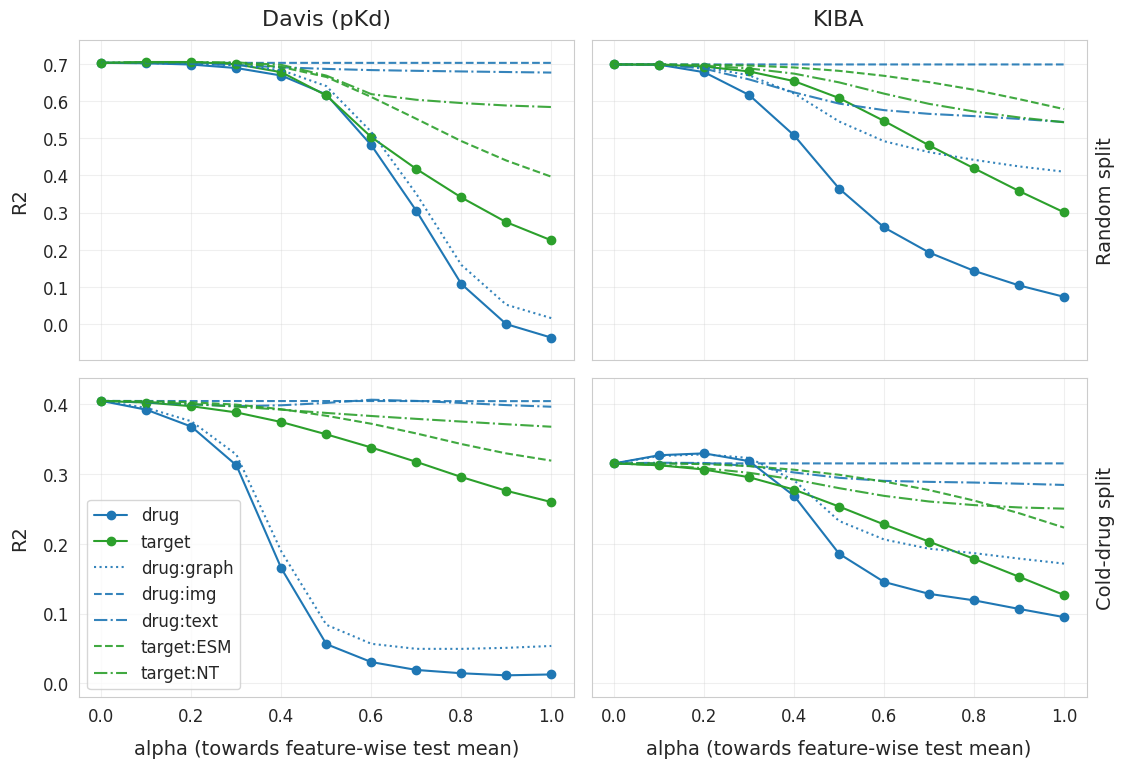

In [2]:
from mb_vae_dti.validating.analysis import plot_perturbation_overview

plot = plot_perturbation_overview(model='multi_modal', metric='r2')

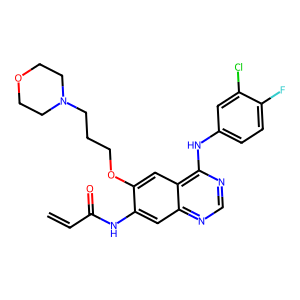

In [ ]:
# draw SMILES using RDKit

from rdkit import Chem
from rdkit.Chem import Draw



0.7: O=C(NCCN1CCN(c2ccc(Cl)cc2Cl)CC1)c1cccc(Cl)c1
0.51: O=C(c1cc(Cl)c(Cl)c(Cl)c1)N1CCN2CCN(CC1)c1ccccc12
0.32: O=C(c1cccc(C#CCN2CCNCC2)c1)c1ccc(Cl)c(Cl)c1Cl
0.72: C#CCN(CCNC(=O)c1ccccc1)CCNc1cccc(Cl)c1Cl
0.56: NC(=O)c1ccc(N2CCN(CC#Cc3cccc(Cl)c3)CC2)c(Cl)c1
0.44: C#CCN1CCN(c2ccccc2NC(=O)c2ccc(Cl)c(Cl)c2)CC1
0.6: NC(=O)c1cc(Cl)c(Cl)c(N2CCN(CC#Cc3ccccc3)CC2)c1
0.84: O=C(NCCN1CCN(c2cccc(Cl)c2Cl)CC1)c1ccc(Cl)cc1
0.57: Cc1ccccc1N1CCN(CCNC(=O)c2ccc(Cl)c(Cl)c2)CC1
0.63: O=C(NCCCN1CCN(c2ccc(Cl)c(Cl)c2)CC1)c1ccccc1


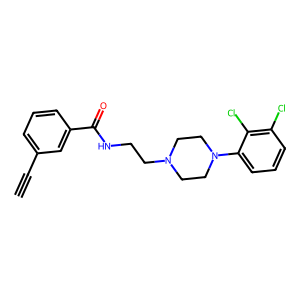

In [71]:
# Tanimoto similarity between two smiles

from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

target = "C#Cc1cccc(C(=O)NCCN2CCN(c3cccc(Cl)c3Cl)CC2)c1"
generated = [
        "O=C(NCCN1CCN(c2cccc(Cl)c2Cl)CC1)c1ccc(Cl)cc1",
        "O=C(NCCN1CCN(c2ccc(Cl)cc2Cl)CC1)c1cccc(Cl)c1",
        "Cc1ccccc1N1CCN(CCNC(=O)c2ccc(Cl)c(Cl)c2)CC1",
        "O=C(NCCCN1CCN(c2ccc(Cl)c(Cl)c2)CC1)c1ccccc1",
        "C#CCN1CCN(c2ccccc2NC(=O)c2ccc(Cl)c(Cl)c2)CC1",
        "NC(=O)c1cc(Cl)c(Cl)c(N2CCN(CC#Cc3ccccc3)CC2)c1",
        "NC(=O)c1ccc(N2CCN(CC#Cc3cccc(Cl)c3)CC2)c(Cl)c1",
        "C#CCN(CCNC(=O)c1ccccc1)CCNc1cccc(Cl)c1Cl",
        "O=C(c1cc(Cl)c(Cl)c(Cl)c1)N1CCN2CCN(CC1)c1ccccc12",
        "O=C(c1cccc(C#CCN2CCNCC2)c1)c1ccc(Cl)c(Cl)c1Cl"
]

mol = Chem.MolFromSmiles(target)
fp = Chem.RDKFingerprint(mol)

for s in set(generated):
    mol2 = Chem.MolFromSmiles(s)
    print(f"{round(Chem.DataStructs.TanimotoSimilarity(fp, Chem.RDKFingerprint(mol2)), 2)}: {s}")

Draw.MolToImage(mol)

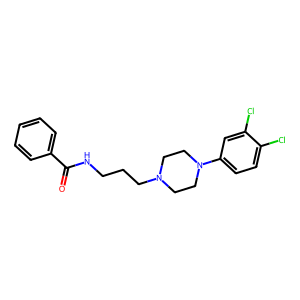

In [75]:
smiles = "O=C(NCCCN1CCN(c2ccc(Cl)c(Cl)c2)CC1)c1ccccc1"
mol = Chem.MolFromSmiles(smiles)
Draw.MolToImage(mol)

In [102]:
# number of heavy atoms in SMILES

from rdkit import Chem

smiles = "c1ncc(CCCCCN2CCCCC2)[nH]1	"
mol = Chem.MolFromSmiles(smiles)

print(mol.GetNumHeavyAtoms())

16


---

In [158]:
from rdkit import Chem
from resolve import *
import pandas as pd
from mb_vae_dti.loading import *
from mb_vae_dti.processing.split import *

df = pd.read_csv("data/processed/dti.csv")
df = add_cold_drug_split(df)

df_test_true = df[((df["split_cold"] == "test") | (df["split_cold"] == "val")) & (df["Y"] == True)]
df_train_true = df[(df["split_cold"] == "train") & (df["Y"] == True)]

def get_heavy_atom_count(smiles):
    """Get heavy atom count from SMILES string"""
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return None
        return mol.GetNumHeavyAtoms()
    except:
        return None

unique_drugs = df_test_true['Drug_SMILES'].unique()
heavy_atom_counts = {smiles: get_heavy_atom_count(smiles) for smiles in unique_drugs}
valid_drugs = {smiles for smiles, count in heavy_atom_counts.items() 
               if count is not None and 22 <= count <= 35}

df_filtered = df_test_true[df_test_true['Drug_SMILES'].isin(valid_drugs)]

aa_counts = df_filtered["Target_AA"].value_counts()
df_sub = df_filtered[df_filtered["Target_AA"].isin(aa_counts[aa_counts.between(64, 128)].index)]

df_train_true_sub = df_train_true[df_train_true["Target_AA"].isin(df_sub["Target_AA"].unique())]
targets = df_train_true_sub["Target_AA"].value_counts().sort_values(ascending=True).head(8).index

df = df[df["Target_AA"].isin(targets)]

print(f"Unique targets: {len(df['Target_AA'].unique())}")
print(f"Unique drugs: {len(df['Drug_SMILES'].unique())}")
print(f"Interactions observed: {len(df)}")
print(f"Number of possible interactions: {len(df['Drug_SMILES'].unique()) * len(df['Target_AA'].unique()):,}")
print(f"Number of positive interactions: {len(df[df['Y'] == True])}")
print(f"Positive interactions in train set: {len(df[(df['Y'] == True) & (df['split_cold'] == 'train')])}")
print(f"Positive interactions in test set: {len(df[(df['Y'] == True) & (df['split_cold'] == 'test')])}")
print(f"Positive interactions in val set: {len(df[(df['Y'] == True) & (df['split_cold'] == 'val')])}")

Unique targets: 8
Unique drugs: 6420
Interactions observed: 7850
Number of possible interactions: 51,360
Number of positive interactions: 3063
Positive interactions in train set: 2417
Positive interactions in test set: 315
Positive interactions in val set: 331


In [170]:
import json
from omegaconf import OmegaConf
import pytorch_lightning as pl
import torch

from external.ESPF.script import *
from mb_vae_dti.training.utils import ConfigManager
from mb_vae_dti.training.modules.full import FullDTIModel

config_path = "./mb_vae_dti/training/configs/full/pretrain_cold.yaml"
ckpt_path = "./data/checkpoints/full_cold.ckpt"
mol_stats_path = "./data/processed/molecular_statistics.json"

config_manager = ConfigManager()
config = config_manager.load_config(config_path=config_path)

with open(mol_stats_path, "r") as f:
    mol_stats = json.load(f)
    key = "drugs_cold"
    dataset_statistics = {
        "general": mol_stats["general"],
        "dataset": mol_stats["datasets"][key]
    }

drug_feats = {"FP-Morgan": 2048}
target_feats = {"FP-ESP": 4170}

model = FullDTIModel(
    phase="train",
    finetune_score=None,
    learning_rate=config.training.learning_rate,
    weight_decay=config.training.weight_decay,
    scheduler=config.training.scheduler,
    weights=config.loss.weights,
    dti_weights=config.loss.dti_weights,
    diff_weights=config.loss.diff_weights,
    contrastive_temp=config.loss.contrastive_temp,
    drug_features=drug_feats,
    target_features=target_feats,
    embedding_dim=config.model.embedding_dim,
    hidden_dim=config.model.hidden_dim,
    factor=config.model.factor,
    n_layers=config.model.n_layers,
    activation=config.model.activation,
    dropout=config.model.dropout,
    bias=config.model.bias,
    encoder_type=config.model.encoder_type,
    aggregator_type=config.model.aggregator_type,

    diffusion_steps=config.model.diffusion_steps,
    sample_every_val=config.model.sample_every_val,
    val_samples_per_embedding=config.model.val_samples_per_embedding,
    test_samples_per_embedding=config.model.test_samples_per_embedding,
    graph_transformer_kwargs=OmegaConf.to_container(config.model.get('graph_transformer_kwargs', {})),
    dataset_infos=dataset_statistics,
)

model.load_pretrained_weights(ckpt_path)
model.eval()
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')
model.to(device)
pl.seed_everything(config.hardware.seed, workers=True)

2025-08-16 11:44:35,221 - mb_vae_dti.training.utils.config_manager - INFO - Loading config from mb_vae_dti/training/configs/full/pretrain_cold.yaml
2025-08-16 11:44:35,231 - mb_vae_dti.training.modules.full - INFO - Full DTI model with:
        - Drug branch: dict_keys(['FP-Morgan']) (dims: dict_values([2048]))
        - Target branch: dict_keys(['FP-ESP']) (dims: dict_values([4170]))
        - Phase: train (finetune_score: None)
        - Aggregator type: attentive
2025-08-16 11:44:35,573 - mb_vae_dti.training.modules.utils - INFO - Loading pretrained weights from data/checkpoints/full_cold.ckpt
2025-08-16 11:44:35,761 - mb_vae_dti.training.modules.utils - INFO - Loaded 533 pretrained weights
2025-08-16 11:44:35,791 - lightning_fabric.utilities.seed - INFO - Global seed set to 42


42